## Тема 2.1 Введение в ML. Основные задачи, виды классических моделей, метрики качества моделей.

### 1. Обучение первой модели

_Характеристики набора данных_:

- **Количество экземпляров**: 150 (по 50 в каждом из трех классов)

- **Количество атрибутов**: 4 числовых, прогнозных атрибута и класс

- **Информация об атрибутах**:

    - длина чашелистика (sepal) в см
    - ширина чашелистика (petal) в см
    - длина лепестка в см
    - ширина лепестка в см
    - класс:
        - Ирис-Сетоса (setosa)
        - Ирис-разноцветный (versicolor)
        - Ирис-Вирджиния (virginica)

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html

In [1]:
from sklearn.datasets import load_iris
from sklearn import tree

from matplotlib import pyplot as plt

import pandas as pd

In [2]:
df = load_iris(as_frame=True).frame

In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [5]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [6]:
df['target'].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [7]:
for t in df['target'].unique():
    print(f'==Class {t}==')
    display(df.query(f'target == {t}').describe().loc[['min', 'mean', 'max'], :])

==Class 0==


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
min,4.300,2.300,1.000,0.100,0.0
mean,5.006,3.428,1.462,0.246,0.0
max,5.800,4.400,1.900,0.600,0.0


==Class 1==


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
min,4.900,2.00,3.00,1.000,1.0
mean,5.936,2.77,4.26,1.326,1.0
max,7.000,3.40,5.10,1.800,1.0


==Class 2==


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
min,4.900,2.200,4.500,1.400,2.0
mean,6.588,2.974,5.552,2.026,2.0
max,7.900,3.800,6.900,2.500,2.0


#### Задача 1.1
Многие библиотеки машинного обучения требуют, чтобы признаки были сохранены в отдельных переменных.  
Объявите две переменные: 
- features — запишите в неё признаки;
- target — целевой признак.  

Выведите на экран размеры этих переменных.

In [8]:
features = df.drop(['target'], axis=1)
target = df['target']

print(features.shape)
print(target.shape)

(150, 4)
(150,)


#### Задача 1.2.
Начнем с обучать модель. Попробуем предсказать результат с помощью дерева. Чтобы запустить обучение, вызовите метод fit() и передайте ему как параметр данные.

In [9]:
model = tree.DecisionTreeClassifier()
model.fit(features, target)

print(model)

DecisionTreeClassifier()


#### Задача 1.3.
Теперь в переменной model полноценная модель.   
Создайте три новых объекта и посмотрите на результаты предсказаний.   
Чтобы предсказать ответы, нужно вызвать метод predict() и передать ему таблицу с признаками новых объектов.  

In [10]:
# взяли средние значения признаков для каждого из трех классов
new_features = pd.DataFrame(
    [[5.00600, 3.428000, 1.462000, 0.246000],
     [5.936000, 2.770000, 4.260000, 1.326000],
     [6.58800, 2.974000, 5.552000, 2.02600]],
    columns=features.columns)

answers = model.predict(new_features) 
print(answers)

[0 1 2]


#### Задача 1.4.
Изучите правила, сформированные моделью и оцените их адекватность.  
Правила можно посмотреть, визуализировав дерево с помощью встроенной функции plot_tree.

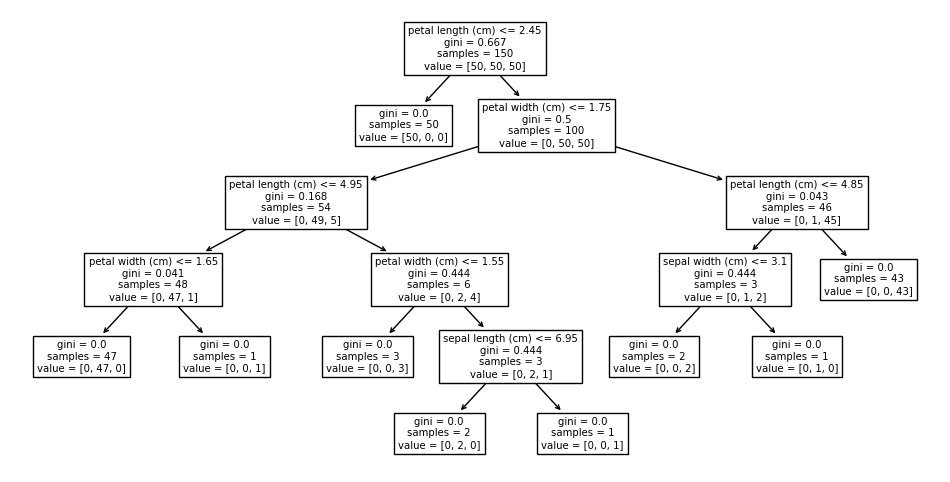

In [11]:
plt.figure(figsize=[12, 6])
tree.plot_tree(model, feature_names=features.columns);

**Итог**
- познакомились с библиотекой scikit learn, и научились доставать из нее нужные модели и данные
- научились делить датасет на фичи и целевой признак
- научились обучать модель и получать с помощью нее предсказания
- попробовали интерпретировать правила, сформированные обученной моделью

### 2. Оцениваем качество модели

Продолжаем использовать датасет из предыдущего блока и решать задачу предсказания класса ириса по его параметрам.  
Научимся оценивать качество модели.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

#### Задача 2.1.

Поделите входные данные на обучающую и тестовую части в соотношении 70/30.  
Оцените равномерность деления, сравнив распределение по классам в выборках.

In [13]:
features_train, features_val, target_train, target_val = train_test_split(features, target, test_size=0.3, random_state=45)

In [14]:
target_train.value_counts(normalize=True).sort_index()

target
0    0.314286
1    0.352381
2    0.333333
Name: proportion, dtype: float64

In [15]:
target_val.value_counts(normalize=True).sort_index()

target
0    0.377778
1    0.288889
2    0.333333
Name: proportion, dtype: float64

#### Задача 2.2  
Обучите модель на тренировочной части датасета.  
Постройте прогноз для тестовой части датасета.  
Посчитайте количество ошибочно расставленных лейблов. Для этого реализуйте функцию, которая:
 - склеит реальные лейблы с прогнозными (zip)
 - в цикле расставит 1 для элементов, у которых лейблы не совпали и 0 для остальных
 - сосчитает сумму единиц, то есть количесто элементов, для которых лейбл выставлен ошибочно

In [16]:
model = tree.DecisionTreeClassifier()
model.fit(features_train, target_train)
predictions_val = model.predict(features_val)

def count_errors(true_answers, pred_answers):
    all_answers_together = zip(true_answers, pred_answers)
    errors_list = [1 if v[0] != v[1] else 0 for v in all_answers_together]
    return sum(errors_list)

print("Ошибок:", count_errors(target_val, predictions_val))

Ошибок: 2


#### Задача 2.3  
Рассчитайте значение метрики accuracy для обученной модели на тестовых данных.
Для этого реализуйте функцию, которая будет похожа на функцию, рассчитывающую количество ошибок, но вместо количества неправильных ответов, она будет возвращать долю правильных ответов.

In [17]:
def accuracy(true_answers, pred_answers):
    all_answers_together = zip(true_answers, pred_answers)
    correct_answers_list = [1 if v[0] == v[1] else 0 for v in all_answers_together]
    return sum(correct_answers_list) / len(correct_answers_list)

print("Accuracy:", accuracy(target_val, predictions_val))

Accuracy: 0.9555555555555556


#### Задача 2.4
Рассчитайте значение метрики accuracy с помощью библиотечной функции. Сравните результат с результатом, полученным с помощью собственной функции. А также сравните значение метрик для прогнозов на тестовой выборе и на обучающей.

In [18]:
print("Accuracy test built-in:", accuracy_score(target_val, predictions_val))

predictions_train = model.predict(features_train)
print("Accuracy train built-in:", accuracy_score(target_train, predictions_train))

Accuracy test built-in: 0.9555555555555556
Accuracy train built-in: 1.0


#### Задача 2.5
Составьте матрицу ошибок и выведите ее.  
Рассчитайте точность и покрытие прогноза класса "2" (virginica).

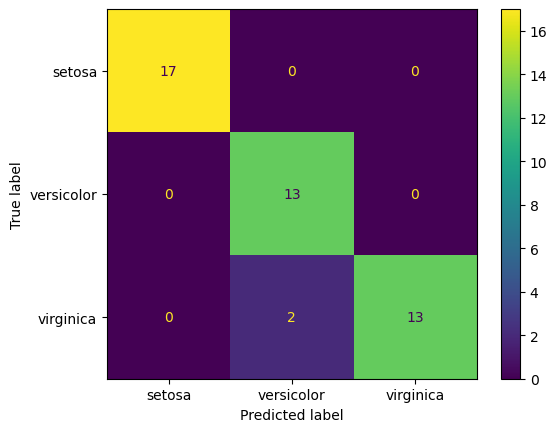

In [19]:
ConfusionMatrixDisplay(confusion_matrix(target_val, predictions_val), display_labels=['setosa', 'versicolor', 'virginica']).plot()

In [20]:
virginica_tp = 13
virginica_true_total = 15
virginica_prediction_total = 13
virginica_precision = virginica_tp / virginica_prediction_total
virginica_recall = virginica_tp / virginica_true_total
print('Virginica precision', virginica_precision)
print('Virginica recall', virginica_recall)

Virginica precision 1.0
Virginica recall 0.8666666666666667


**Итог**
- научились выделять валидационную часть из данных
- научились импортировать библиотечные метрики 
- разобрались в устройстве некоторых метрик, реализовали их
- научились интерпретировать метрики